In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
from numpy.linalg import pinv
from numpy.linalg import lstsq
from scipy import linalg
from scipy import stats
from scipy import integrate
from scipy.optimize import linprog
#import seaborn as sns
import matplotlib.pyplot as plt
#import pandas as pd
import math
from math import sqrt
import functools
from random import gauss
import cvxpy as cp

# **Attention! It takes long time to run this code. Part 1-Q5, Part 2-Q4  and Part 2-Q5 will take 1h30mins, 10mins, 1h respectively! **

# **PART 1 - Q2**


In [2]:
def L_2(X, y):
    X_t = X.transpose()
    return np.dot(np.dot(pinv(np.dot(X_t,X)), X_t), y)
def L_1(X, y):
    c=np.ones(X.shape[0])
    z_p = cp.Variable(X.shape[0])
    z_n = cp.Variable(X.shape[0])
    b = cp.Variable(X.shape[1])
    prob = cp.Problem(cp.Minimize(c.T@z_p+c.T@z_n),
                 [(z_p-z_n)+X@b==y,
                 #z==z_p-z_n,
                 z_p>=0,
                 z_n>=0])
    prob.solve()
    return b.value




# **PART 1 - Q5**

In [ ]:
def generate_dataset(beta_star, n, noise):
    
    X = np.random.uniform(0, 1, (n, p))

    if noise == 'normal':
        eps = np.random.uniform(0, 1, n)

    else:  # noise == 'exp'
        eps = np.random.laplace(0, 1, n)

    Y = np.array(np.dot(X, beta_star) + eps)
    return X, Y

In [ ]:
##compute 4 graphs
p = 400
nb_kappa = 5
nb_simu = 10
kappa_tab = np.linspace(0.1, 0.9, nb_kappa)
n_tab=np.zeros(nb_kappa)
for i in range(nb_kappa):
    n_tab[i]=int(p/kappa_tab[i])
beta_star = np.random.normal(0, 1, p)
noise1 = 'normal'
noise2 = 'exp'
error_tab_rho1_noise1 = np.zeros((nb_simu, nb_kappa))
error_tab_rho2_noise1 = np.zeros((nb_simu, nb_kappa))
error_tab_rho1_noise2 = np.zeros((nb_simu, nb_kappa))
error_tab_rho2_noise2 = np.zeros((nb_simu, nb_kappa))
for i in range(nb_kappa):
    n = int(n_tab[i])
    for j in range(nb_simu):
        X1, y1 = generate_dataset(beta_star, n, noise1)
        X2, y2 = generate_dataset(beta_star, n, noise2)
        error_tab_rho1_noise1[j, i] = norm(L_1(X1, y1)-beta_star) 
        error_tab_rho2_noise1[j, i] = norm(L_2(X1, y1)-beta_star) 
        error_tab_rho1_noise2[j, i] = norm(L_1(X2, y2)-beta_star)
        error_tab_rho2_noise2[j, i] = norm(L_2(X2, y2)-beta_star) 
    


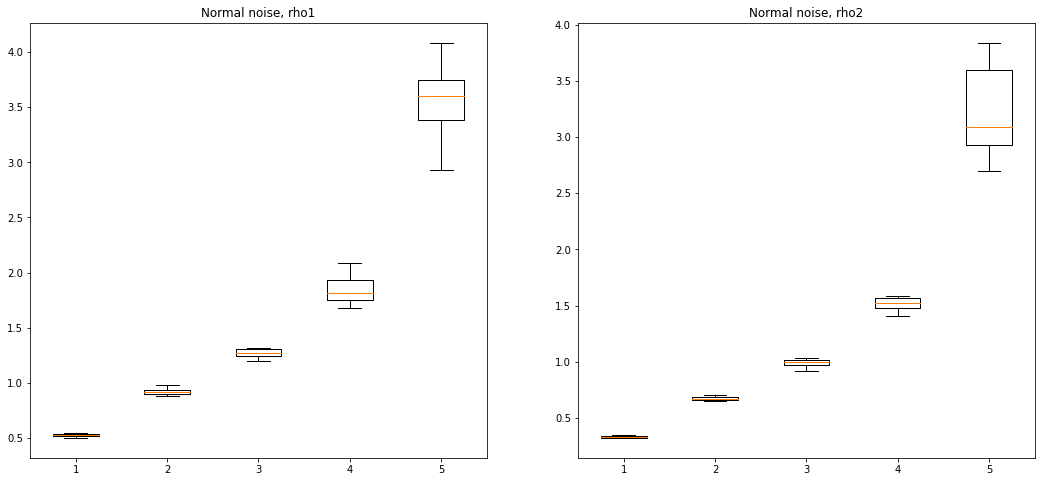

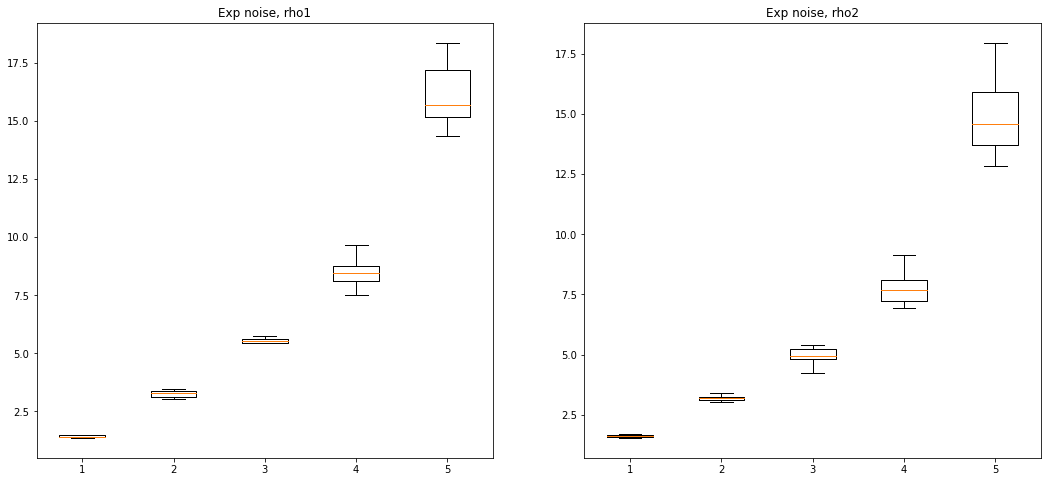

In [157]:
##plot
fig1, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig2, (ax21, ax22) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

bplot11 = ax11.boxplot(error_tab_rho1_noise1, showfliers = False)
ax11.set_title('Normal noise, rho1')

bplot12 = ax12.boxplot(error_tab_rho2_noise1, showfliers = False)
ax12.set_title('Normal noise, rho2')

bplot21 = ax21.boxplot(error_tab_rho1_noise2, showfliers = False)
ax21.set_title('Exp noise, rho1')

bplot22 = ax22.boxplot(error_tab_rho2_noise2, showfliers = False)
ax22.set_title('Exp noise, rho2')

plt.show()

In [ ]:
##compute MLE and LSE for exp noisy
error_esp_rho1_noise1=np.zeros(error_tab_rho1_noise1.shape[1])
error_esp_rho1_noise2=np.zeros(error_tab_rho1_noise2.shape[1])
error_esp_rho2_noise1=np.zeros(error_tab_rho2_noise1.shape[1])
error_esp_rho2_noise2=np.zeros(error_tab_rho2_noise2.shape[1])
for i in range(nb_kappa):
    error_esp_rho1_noise1[i]=np.mean(error_tab_rho1_noise1[:,i])
    error_esp_rho1_noise2[i]=np.mean(error_tab_rho1_noise2[:,i])
    error_esp_rho2_noise1[i]=np.mean(error_tab_rho2_noise1[:,i])
    error_esp_rho2_noise2[i]=np.mean(error_tab_rho2_noise2[:,i])



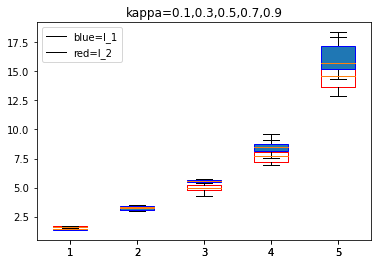

In [158]:
## plot MLE and LSE for exp noisy
plt.boxplot(error_tab_rho1_noise2, showfliers = False,patch_artist="blue",boxprops=dict(color="blue"))
plt.boxplot(error_tab_rho2_noise2, showfliers = False,boxprops=dict(color="red"))
plt.title('kappa=0.1,0.3,0.5,0.7,0.9')
plt.legend(labels=['blue=l_1','red=l_2'],loc='best')
plt.show()

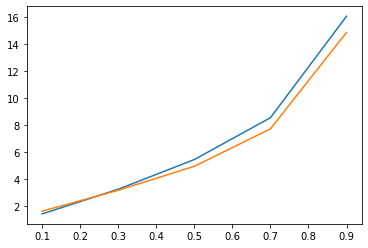

In [160]:
##plot mean values of MLE and LSE

plt.plot(kappa_tab,error_esp_rho1_noise2,kappa_tab,error_esp_rho2_noise2)

# **PART 2 - Q1**

In [ ]:
def prox_quad(x,c):
    return x/(1+c)
 def prox_quad_prime(x,c):
    return 1/(1+c)
def prox_abs(x,c):
    return np.sign(x)*(np.max((0,np.abs(x)-c)))
def prox_abs_prime(x,c):
    if (x>c) | (-x>c):
        return 1
    return 0

# **PART 2 - Q4**

In [ ]:
    return 0
def F_r(t,r):
    if r != 0:
        return stats.norm.cdf(t/r)+np.exp(r**2/2)/2*(np.exp(t)*stats.norm.cdf(-(t+r**2)/r)-np.exp(-t)*stats.norm.cdf((t-r**2)/r))
    else:
        return stats.laplace.cdf(t)
def F_r_bar(t,r):
    return 1-F_r(t,r)
def F_kappa(t,r,kappa):
    return F_r_bar(t,r)-(1-kappa)/2


def F_r_final(r,kappa):
    a_inf=-100
    b_max=100
    f=lambda x: F_kappa(x,r,kappa)
    T=scipy.optimize.bisect(f,0,100)
    fun = lambda x: x * F_r_bar(x,r)
    if T>0:
        return kappa*r**2-4*integrate.quad(fun,0,T)[0]
    else:
        return kappa*r**2
    

def bisection_r(kappa, stepmax=100, tol=1e-5):
    
    fun=lambda x:  F_r_final(x,kappa)
    return scipy.optimize.bisect(fun,0,10)


In [ ]:
#Plot and calculate kappa and r, takes a few minutes
Kappa=np.linspace(0.01,0.95,num=100)
r_real=[bisection_r(k) for k in Kappa]
plt.plot(Kappa,r_real)

# **PART 2 - Q5**

In [ ]:
def f1(z,c):
    return (z-prox_abs(z,c))**2
def f2(z,c):
    return prox_abs_prime(z,c)
def monte_carlo_expectancy(r,c, Nsim = 1e5):
    eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
    eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
    z = eps1+r*eps2 #zepsilon variable
    E1 = np.array(list(map(functools.partial(f1,c=c), z)))
    E2 = np.array(list(map(functools.partial(f2,c=c), z)))

    return np.sum(E1)/Nsim,np.sum(E2)/Nsim
def F(r, c):
    E1, E2 = monte_carlo_expectancy(r,c)
    return sqrt(E1/(1-E2))
def solve_iteration(c, err=1e-2) :
    r1 = 0.1
    r2 = 1
    stop = 100
    iter = 0
    while (abs(r1-r2)>1e-2 and iter<stop): 
        r1 = r2
        r2 = F(r1,c)
        iter +=1
        #print(abs(r1-r2)," ")
    if iter>=stop : 
        print("stop iter = 100")
    return r2
def kappa_quad(r):
    return 1-(1/(1+c))

def kappa_abs(r,c, Nsim= 1e5):
    eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
    eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
    z = eps1+r*eps2 #zepsilon variable
    E2 = np.array(list(map(functools.partial(f2,c=c), z)))
    return 1-np.sum(E2)/Nsim

In [ ]:
#calculate r and kappa
c_values = np.linspace(0.01,7, 50) #10) cest bcp environ 60min pour tourner 
r_values_noise2_rho1 = np.zeros(50)
kappa_values = np.zeros(50)
for i in range(50):
    r_values_noise2_rho1 [i]=solve_iteration(c_values[i])
    kappa_values[i]=kappa_abs(r_values_noise2_rho1 [i], c_values[i])
    print(i,": ",c_values[i]," ",kappa_values[i]," ",r_values_noise2_rho1 [i],"\n")


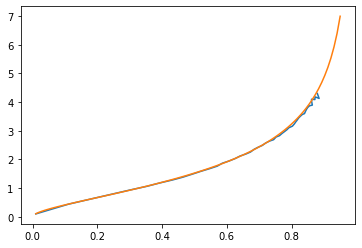

In [162]:
#compare Monte Calo and analytic solution
plt.plot(kappa_values,r_values_noise2_rho1  ,Kappa,r_real)

# **PART 2 - Q6**

In [164]:
sigma_laplacien = 2
def LSE_laplacien_abs(kappa):
    return sqrt(sigma_laplacien*(kappa)/(1-kappa))

def zeta(t):
    phi_inv_t = stats.norm.ppf(t)
    return 2*phi_inv_t*(stats.norm.pdf(phi_inv_t)-phi_inv_t*(1-t))

def noise1_rho1_analytic(kappa):
    z = zeta((kappa+1)/2)
    return (kappa-z)/z


In [165]:
##calculate
r_values_noise1_rho1 = [noise1_rho1_analytic(kappa) for kappa in Kappa]
r_values_noise2_rho1 = r_real
r_values_noise2_rho2 = []
for kappa in Kappa:
    r_values_noise2_rho2.append(LSE_laplacien_abs(kappa))
r_values_noise1_rho2 = [0.5*r for r in r_values_noise2_rho2]


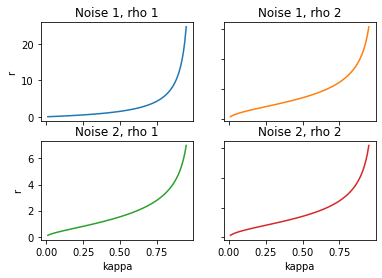

In [166]:
##plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(Kappa, r_values_noise1_rho1)
axs[0, 0].set_title('Noise 1, rho 1')
axs[0, 1].plot(Kappa, r_values_noise1_rho2, 'tab:orange')
axs[0, 1].set_title('Noise 1, rho 2')
axs[1, 0].plot(Kappa, r_values_noise2_rho1, 'tab:green')
axs[1, 0].set_title('Noise 2, rho 1')
axs[1, 1].plot(Kappa, r_values_noise2_rho2, 'tab:red')
axs[1, 1].set_title('Noise 2, rho 2')

for ax in axs.flat:
    ax.set(xlabel='kappa', ylabel='r')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# **PART 2 - Q7**

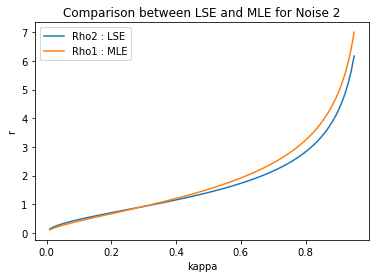

In [156]:
##plot analytic errors for MLE and LSE
fig, ax = plt.subplots()
ax.set_title('Comparison between LSE and MLE for Noise 2')
ax.plot(Kappa,r_values_noise2_rho2, label='Rho2 : LSE')
ax.plot(Kappa,r_real, label='Rho1 : MLE')
ax.set(xlabel='kappa', ylabel='r')
leg = ax.legend();